In [1]:
import model, dataset
from importlib import reload

from torchinfo import summary
from torch.utils.data import Dataset, DataLoader

from matplotlib import pyplot as plt
import skimage

D:\Github\smlm-dl\smlm_dl\dataset.py:220: RuntimeWarning: divide by zero encountered in log
  im = axes[1].imshow(np.log(tiled_images))


39:	 [x = -4.198,], [y = -6.271,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1132.103,], [bg = 6.729,],
82:	 [x = 7.086,], [y = 8.006,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1178.340,], [bg = 61.811,],
108:	 [x = -2.006,], [y = 7.196,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1658.191,], [bg = 6.793,],
50:	 [x = 6.259,], [y = -6.267,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1377.951,], [bg = 52.599,],
42:	 [x = 3.425,], [y = 7.824,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 577.829,], [bg = 43.566,],
2:	 [x = -3.685,], [y = 4.608,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1051.276,], [bg = 67.330,],
99:	 [x = -6.135,], [y = 7.148,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1866.576,], [bg = 78.148,],
13:	 [x = 0.188,], [y = -4.507,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1839.179,], [bg = 40.393,],


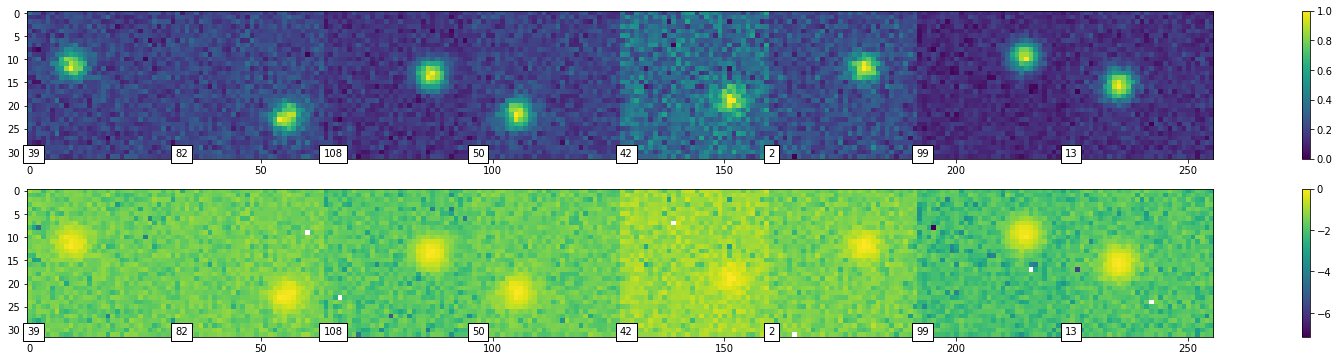

In [2]:
training_data = dataset.Gaussian2DPSFDataset(length=128, psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(training_data)

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)

dd = next(iter(train_dataloader))

C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


Layer (type (var_name))                  Output Shape              Param #
EncoderModel                             --                        --
├─ModuleDict (encoders)                  --                        --
│    └─Sequential (conv_layer0)          [32, 16, 16, 16]          --
│    │    └─GroupNorm (0)                [32, 1, 32, 32]           2
│    │    └─Conv2d (1)                   [32, 16, 32, 32]          160
│    │    └─ReLU (2)                     [32, 16, 32, 32]          --
│    │    └─GroupNorm (3)                [32, 16, 32, 32]          32
│    │    └─Conv2d (4)                   [32, 16, 32, 32]          2,320
│    │    └─ReLU (5)                     [32, 16, 32, 32]          --
│    │    └─MaxPool2d (6)                [32, 16, 16, 16]          --
│    │    └─Dropout2d (7)                [32, 16, 16, 16]          --
│    └─Sequential (conv_layer1)          [32, 32, 8, 8]            --
│    │    └─GroupNorm (0)                [32, 16, 16, 16]          32
│    │    └─

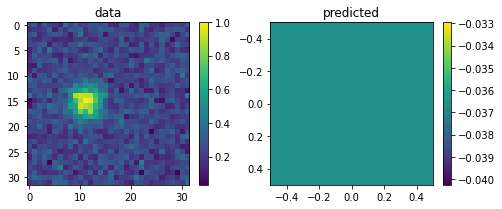

In [3]:
reload(model)
encoder_model = model.EncoderModel(img_size=(32,32),
                                   depth=4,
                                   first_layer_out_channels=16)
print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"],))

model.check_model(encoder_model, train_dataloader)

{'x': [<act: Tanh, offset: 0, scaling: 24.0, default: 0, per psf: True, >], 'y': [<act: Tanh, offset: 0, scaling: 24.0, default: 0, per psf: True, >], 'A': [<act: ReLU, offset: 0, scaling: 1000, default: 1, per psf: True, >], 'sig': [<act: ReLU, offset: 2, scaling: 1, default: 5, per psf: True, >], 'bg': [<act: Tanh, offset: 0, scaling: 500, default: 0, per psf: False, >]}
Layer (type (var_name))                  Output Shape              Param #
Gaussian2DModel                          --                        --
├─ModuleDict (skips)                     --                        --
│    └─Sequential (skip_conv_layer0)     [32, 4, 1, 1]             --
│    │    └─GroupNorm (0)                [32, 1, 32, 32]           2
│    │    └─Conv2d (1)                   [32, 4, 1, 1]             4,100
│    │    └─ReLU (2)                     [32, 4, 1, 1]             --
│    │    └─GroupNorm (3)                [32, 4, 1, 1]             8
│    │    └─Conv2d (4)                   [32, 4, 1, 1]    

D:\Github\smlm-dl\smlm_dl\model.py:551: RuntimeWarning: invalid value encountered in log10
  im = axes[0, i].imshow(np.log10(img[0]))


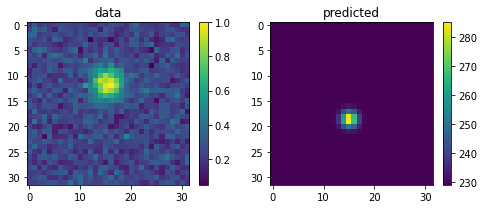

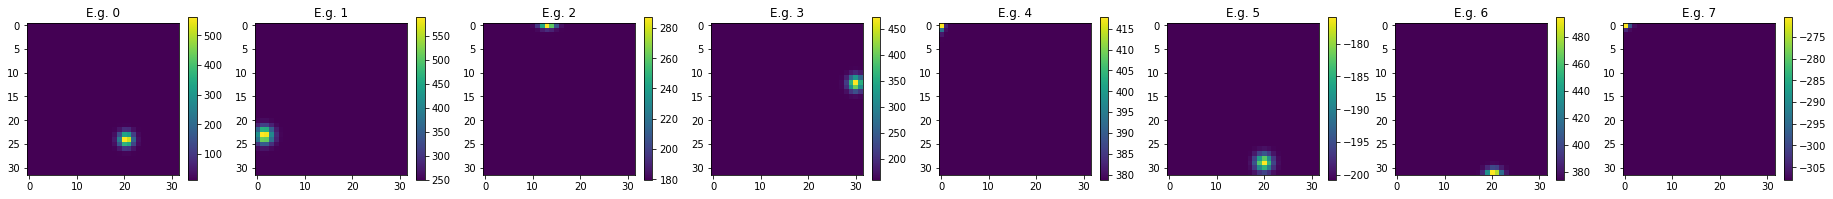

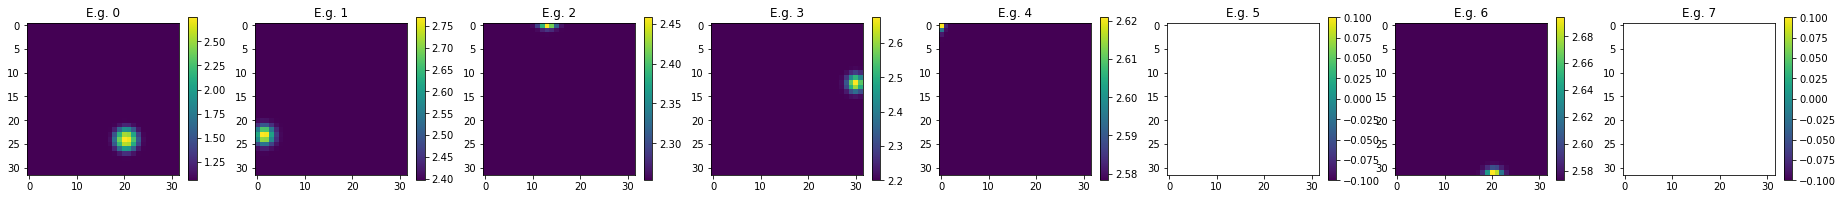

In [4]:
reload(model)

encoder_model = model.Gaussian2DModel(img_size=(32,32),
                                      fit_params=['x','y','A','sig','bg'],
                                      max_psf_count=1,
                                      depth=3,
                                      skip_channels=4)
                                      #first_layer_out_channels=16,)

print(encoder_model.fit_params)


print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"],))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                  Output Shape              Param #
Gaussian2DModel                          --                        --
├─ModuleDict (encoders)                  --                        --
│    └─Sequential (conv_layer0)          [32, 16, 16, 16]          --
│    │    └─GroupNorm (0)                [32, 1, 32, 32]           2
│    │    └─Conv2d (1)                   [32, 16, 32, 32]          160
│    │    └─ReLU (2)                     [32, 16, 32, 32]          --
│    │    └─GroupNorm (3)                [32, 16, 32, 32]          32
│    │    └─Conv2d (4)                   [32, 16, 32, 32]          2,320
│    │    └─ReLU (5)                     [32, 16, 32, 32]          --
│    │    └─MaxPool2d (6)                [32, 16, 16, 16]          --
│    │    └─Dropout2d (7)                [32, 16, 16, 16]          --
│    └─Sequential (conv_layer1)          [32, 32, 8, 8]            --
│    │    └─GroupNorm (0)                [32, 16, 16, 16]          32
│    │    └─

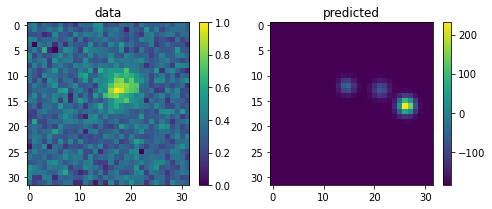

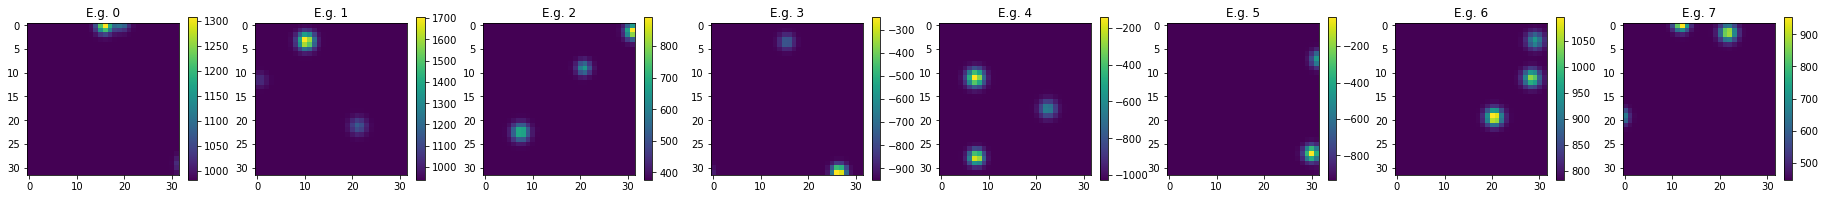

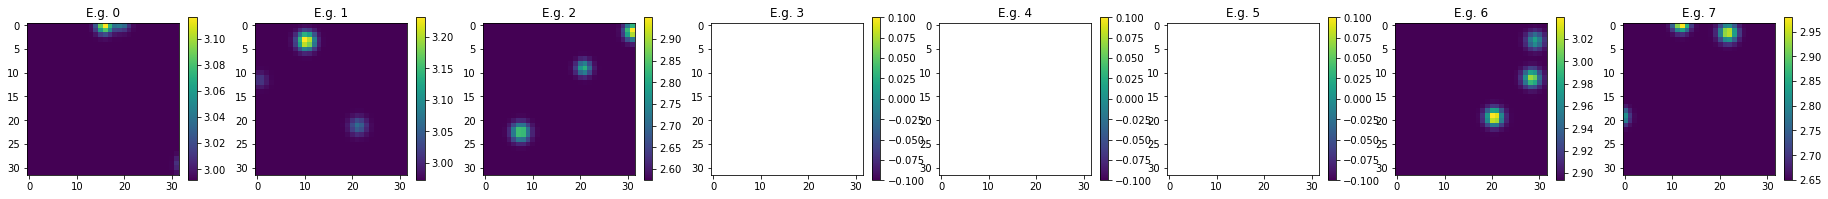

In [5]:
reload(model)

encoder_model = model.Gaussian2DModel(fit_params=['x','y','A','sig','bg'],
                                      max_psf_count=3,
                                      depth=3, first_layer_out_channels=16,)
print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"],))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                  Output Shape              Param #
Template2DModel                          --                        --
├─ModuleDict (encoders)                  --                        --
│    └─Sequential (conv_layer0)          [32, 16, 16, 16]          --
│    │    └─GroupNorm (0)                [32, 1, 32, 32]           2
│    │    └─Conv2d (1)                   [32, 16, 32, 32]          160
│    │    └─ReLU (2)                     [32, 16, 32, 32]          --
│    │    └─GroupNorm (3)                [32, 16, 32, 32]          32
│    │    └─Conv2d (4)                   [32, 16, 32, 32]          2,320
│    │    └─ReLU (5)                     [32, 16, 32, 32]          --
│    │    └─MaxPool2d (6)                [32, 16, 16, 16]          --
│    │    └─Dropout2d (7)                [32, 16, 16, 16]          --
│    └─Sequential (conv_layer1)          [32, 32, 8, 8]            --
│    │    └─GroupNorm (0)                [32, 16, 16, 16]          32
│    │    └─

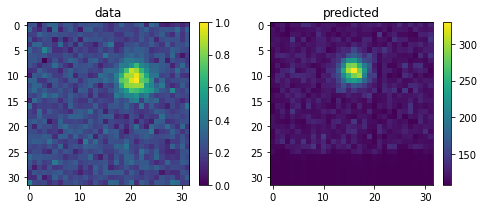

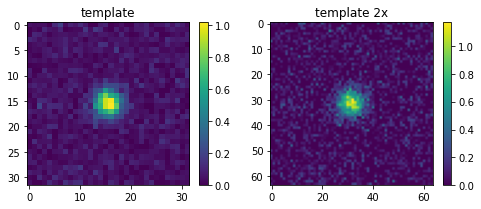

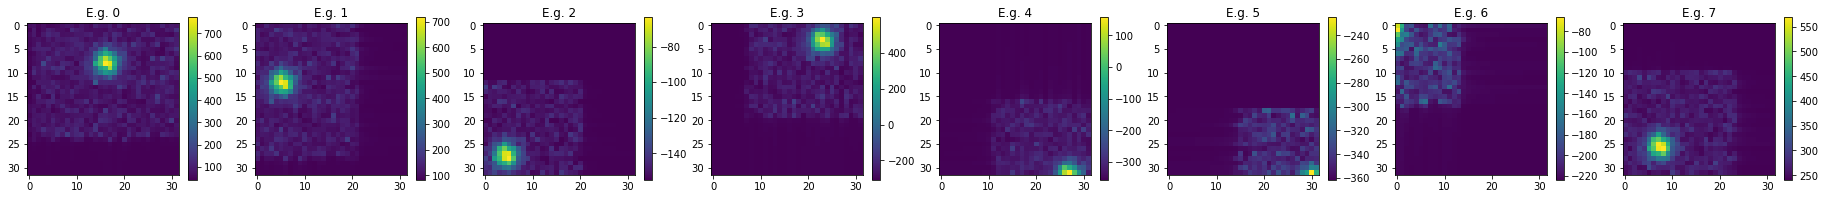

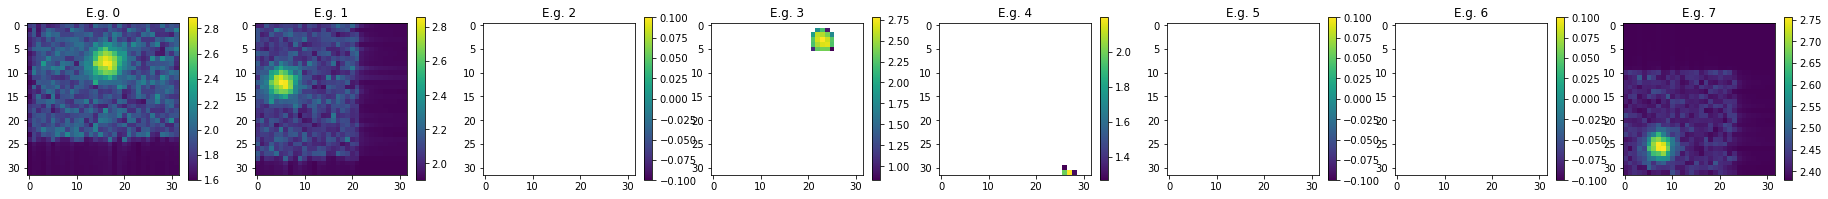

In [6]:
reload(model)

encoder_model = model.Template2DModel(fit_params=['x','y','A','bg'],
                                      # max_psf_count=3,
                                      # depth=3, first_layer_out_channels=16,
                                     )
print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"],))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                  Output Shape              Param #
Template2DModel                          --                        --
├─ModuleDict (encoders)                  --                        --
│    └─Sequential (conv_layer0)          [32, 16, 16, 16]          --
│    │    └─GroupNorm (0)                [32, 1, 32, 32]           2
│    │    └─Conv2d (1)                   [32, 16, 32, 32]          160
│    │    └─ReLU (2)                     [32, 16, 32, 32]          --
│    │    └─GroupNorm (3)                [32, 16, 32, 32]          32
│    │    └─Conv2d (4)                   [32, 16, 32, 32]          2,320
│    │    └─ReLU (5)                     [32, 16, 32, 32]          --
│    │    └─MaxPool2d (6)                [32, 16, 16, 16]          --
│    │    └─Dropout2d (7)                [32, 16, 16, 16]          --
│    └─Sequential (conv_layer1)          [32, 32, 8, 8]            --
│    │    └─GroupNorm (0)                [32, 16, 16, 16]          32
│    │    └─

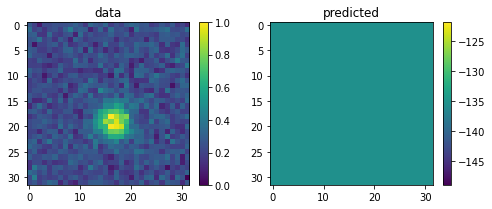

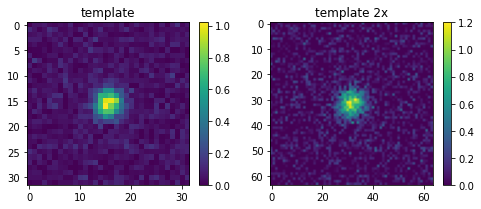

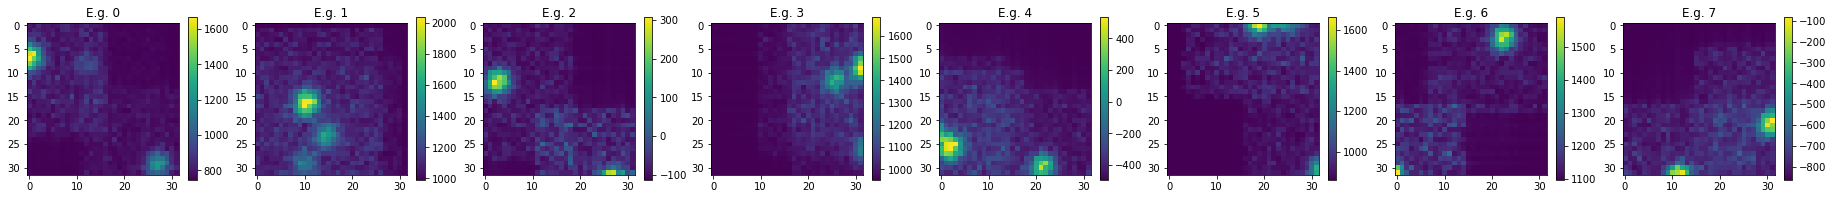

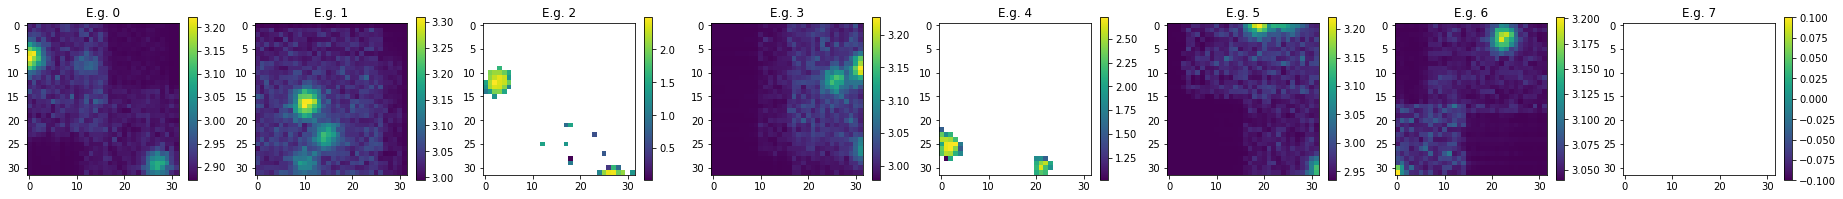

In [7]:
reload(model)


encoder_model = model.Template2DModel(fit_params=['x','y','A','bg',],
                                      max_psf_count=3,
                                      depth=3, first_layer_out_channels=16,)
print(summary(encoder_model, input_size=(32, 1, 32, 32), row_settings=["var_names"],))

model.check_model(encoder_model, train_dataloader)

input shape: torch.Size([32, 1, 32, 32]), output_shape: (32, 1, 32, 32)


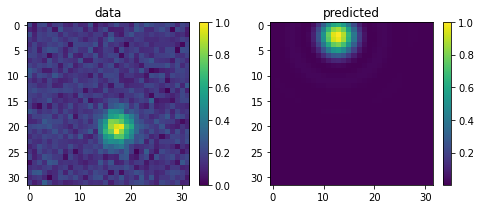

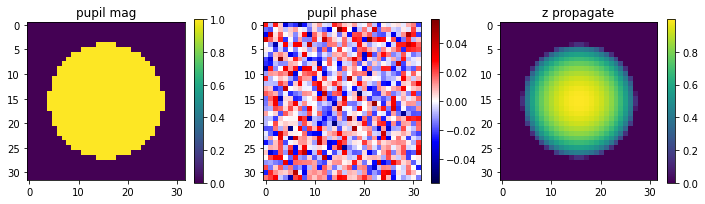

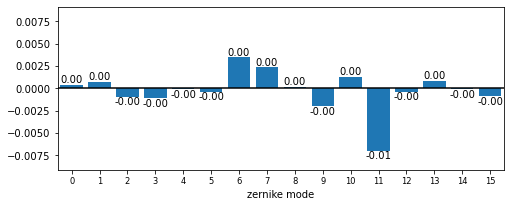

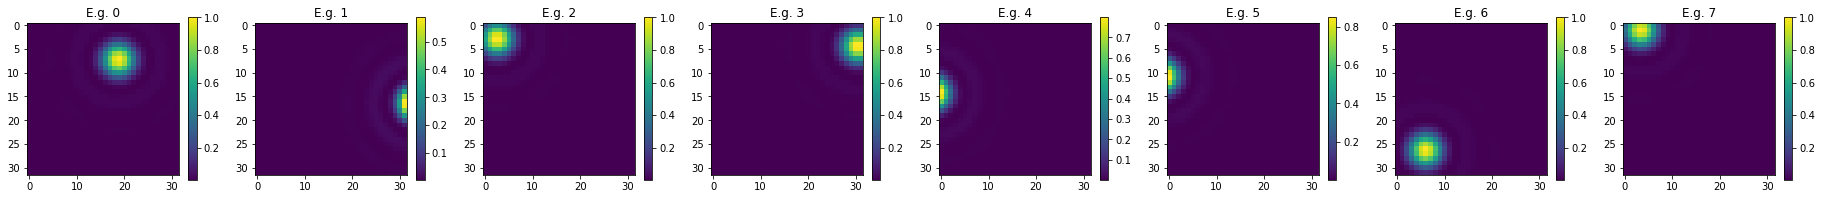

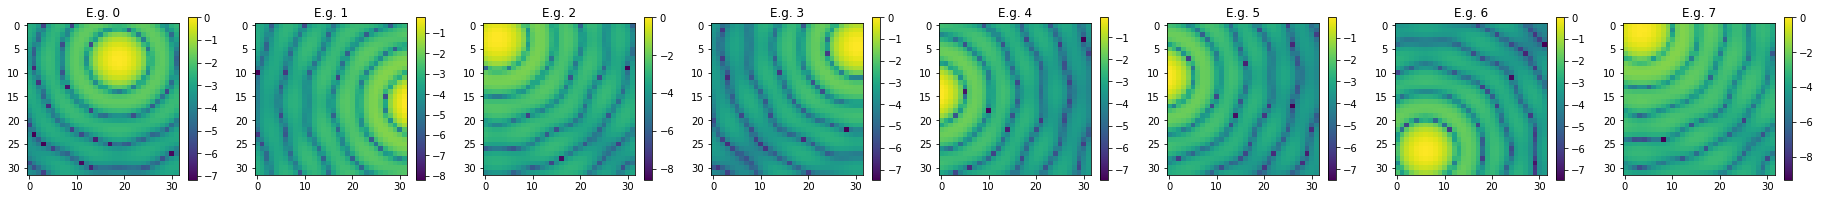

In [8]:
reload(model)

encoder_model = model.FourierOptics2DModel(fit_params=['x','y',],
                                           pupil_params={'scale':0.75, 'apod':False},
                                           normalize=False,
                                           depth=3, first_layer_out_channels=16,)
# print(summary(encoder_model, input_size=(1024, 1, 32, 32), row_settings=["var_names"],))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                  Output Shape              Param #
FourierOptics2DModel                     --                        --
├─ModuleDict (encoders)                  --                        --
│    └─Sequential (conv_layer0)          [1024, 16, 16, 16]        --
│    │    └─GroupNorm (0)                [1024, 1, 32, 32]         2
│    │    └─Conv2d (1)                   [1024, 16, 32, 32]        160
│    │    └─ReLU (2)                     [1024, 16, 32, 32]        --
│    │    └─GroupNorm (3)                [1024, 16, 32, 32]        32
│    │    └─Conv2d (4)                   [1024, 16, 32, 32]        2,320
│    │    └─ReLU (5)                     [1024, 16, 32, 32]        --
│    │    └─MaxPool2d (6)                [1024, 16, 16, 16]        --
│    │    └─Dropout2d (7)                [1024, 16, 16, 16]        --
│    └─Sequential (conv_layer1)          [1024, 32, 8, 8]          --
│    │    └─GroupNorm (0)                [1024, 16, 16, 16]        32
│    │    └─

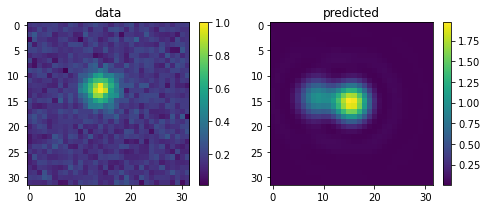

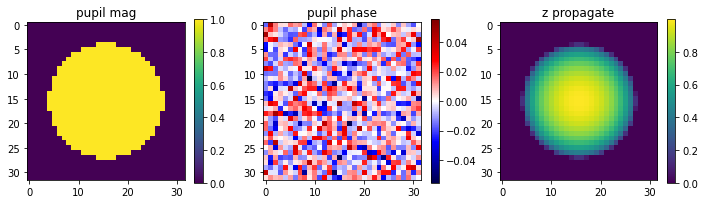

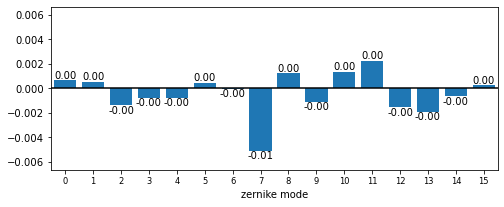

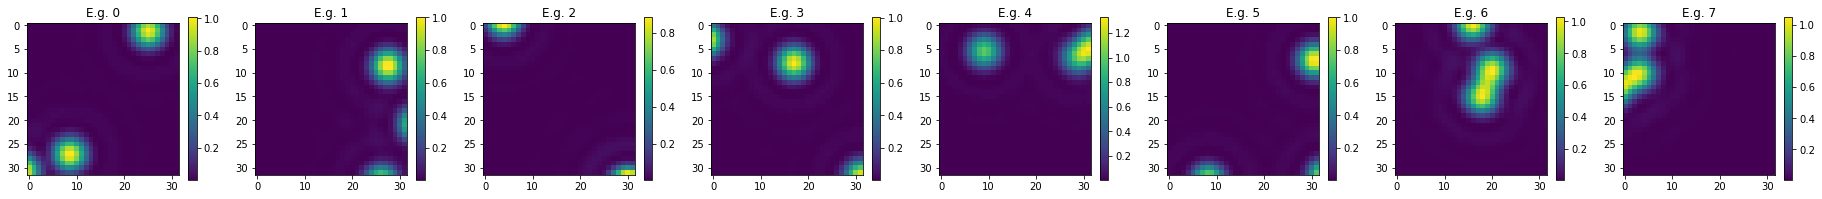

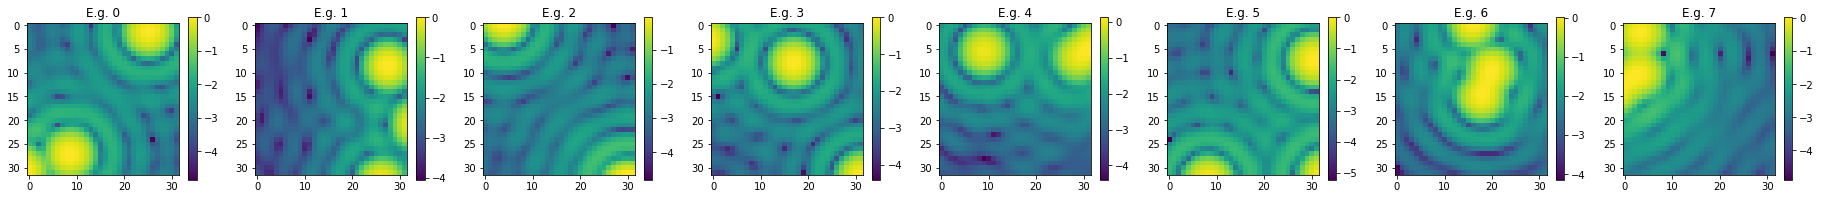

In [9]:
reload(model)

encoder_model = model.FourierOptics2DModel(fit_params=['x','y',], max_psf_count=3,
                                           depth=3, first_layer_out_channels=16,)
print(summary(encoder_model, input_size=(1024, 1, 32, 32), row_settings=["var_names"],))

model.check_model(encoder_model, train_dataloader)

Layer (type (var_name))                  Output Shape              Param #
FourierOptics2DModel                     --                        --
├─ModuleDict (encoders)                  --                        --
│    └─Sequential (conv_layer0)          [1024, 16, 16, 16]        --
│    │    └─GroupNorm (0)                [1024, 1, 32, 32]         2
│    │    └─Conv2d (1)                   [1024, 16, 32, 32]        160
│    │    └─ReLU (2)                     [1024, 16, 32, 32]        --
│    │    └─GroupNorm (3)                [1024, 16, 32, 32]        32
│    │    └─Conv2d (4)                   [1024, 16, 32, 32]        2,320
│    │    └─ReLU (5)                     [1024, 16, 32, 32]        --
│    │    └─MaxPool2d (6)                [1024, 16, 16, 16]        --
│    │    └─Dropout2d (7)                [1024, 16, 16, 16]        --
│    └─Sequential (conv_layer1)          [1024, 32, 8, 8]          --
│    │    └─GroupNorm (0)                [1024, 16, 16, 16]        32
│    │    └─

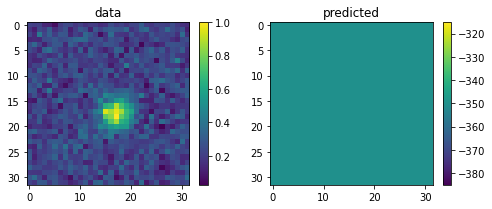

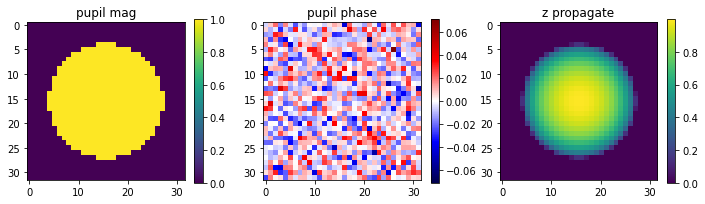

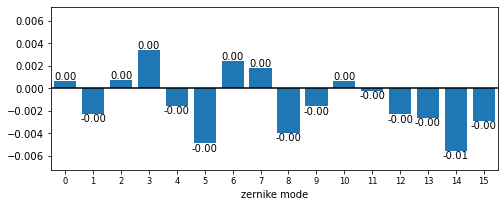

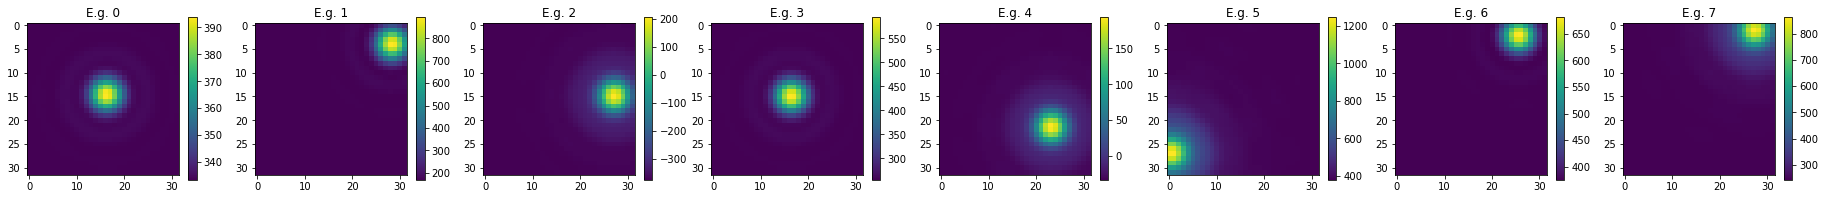

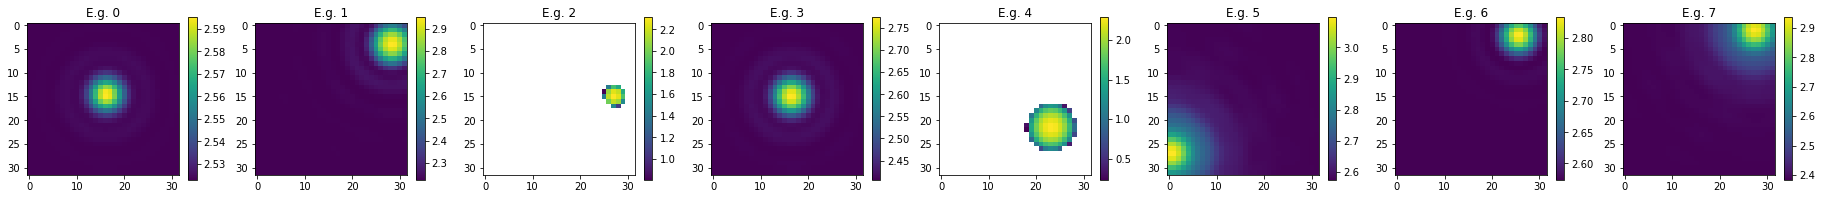

In [10]:
reload(model)

encoder_model = model.FourierOptics2DModel(fit_params=['x','y','z','bg','A'], max_psf_count=1,
                                           normalize=False,
                                           depth=3, first_layer_out_channels=16,)
print(summary(encoder_model, input_size=(1024, 1, 32, 32), row_settings=["var_names"],))

model.check_model(encoder_model, train_dataloader)


In [11]:
model.BaseFitModel(model.Gaussian2DRenderer)
print()

4:	 [x = -3.447,], [y = -3.595,],
5:	 [x = 0.467,], [y = -3.463,],
7:	 [x = -4.973,], [y = 2.847,],
6:	 [x = 2.943,], [y = -4.818,],
1:	 [x = 2.934,], [y = -2.384,],
3:	 [x = 4.366,], [y = -2.881,],
2:	 [x = -3.606,], [y = -3.871,],
0:	 [x = 4.288,], [y = -3.450,],


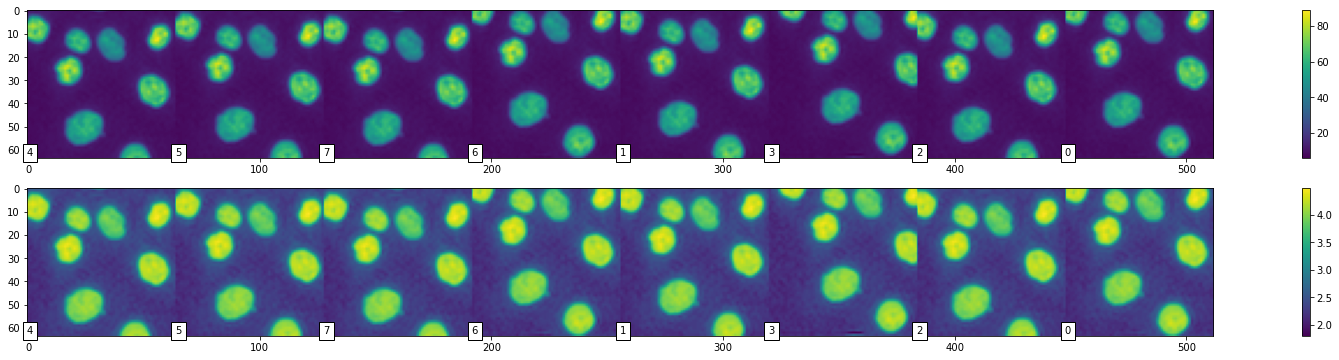

In [12]:
reload(dataset)
image_training_data = dataset.SingleImageDataset(skimage.data.human_mitosis()[20:, 20:],
                                                 out_size=(64,64),
                                                 template_padding=(8,8),
                                                 length=8, img_params={'shifts':[5, 5]},
                                                 noise_params={}, augmentations={}, normalize=False)
dataset.inspect_images(image_training_data)

train_image_dataloader = DataLoader(image_training_data,
                                    batch_size=32, shuffle=True)
# print(image_training_data[1][0].shape)

dd = next(iter(train_image_dataloader))
# print(dd[0].shape, dd[1])

input shape: torch.Size([8, 1, 64, 64]), output_shape: (8, 1, 64, 64)


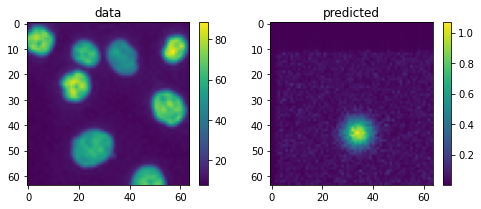

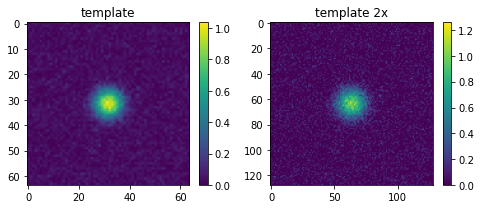

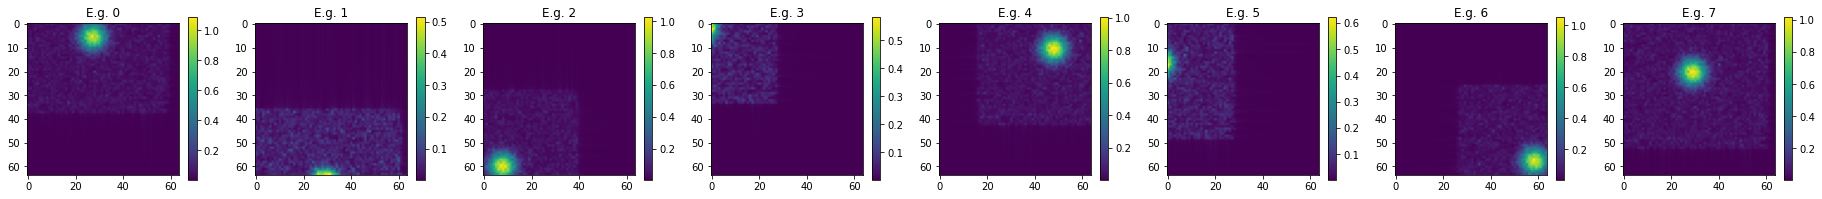

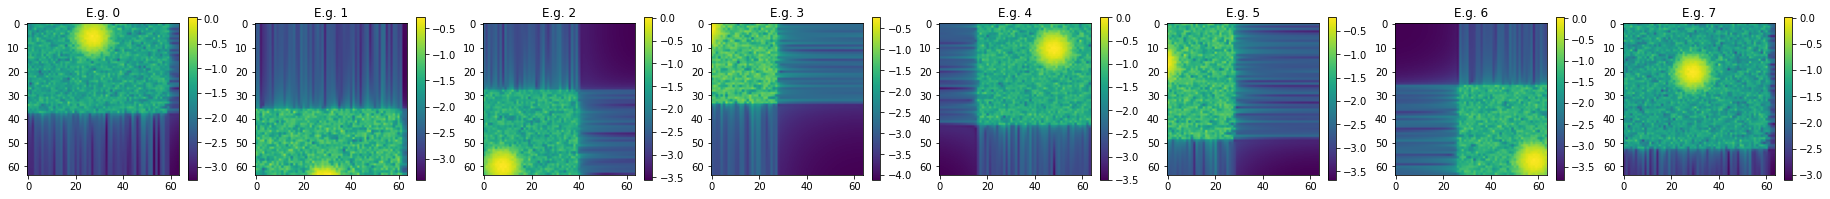

In [13]:
reload(model)

encoder_model = model.Template2DModel(img_size=(64,64),
                                      fit_params=['x','y'],
                                      # max_psf_count=3,
                                      depth=3, first_layer_out_channels=16,)
# print(summary(encoder_model, input_size=(8, 1, 64, 64), row_settings=["var_names"],))

model.check_model(encoder_model, train_image_dataloader)

(1, 64, 64)
input shape: torch.Size([8, 1, 64, 64]), output_shape: (8, 1, 64, 64)


D:\Github\smlm-dl\smlm_dl\model.py:325: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if template_init is None or template_init == 'gauss':


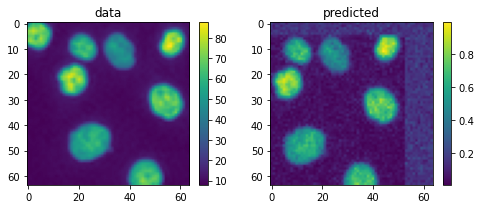

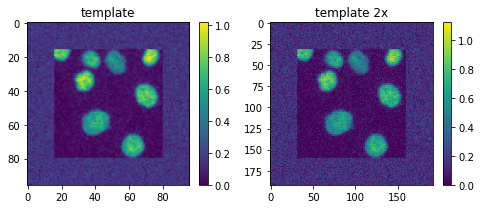

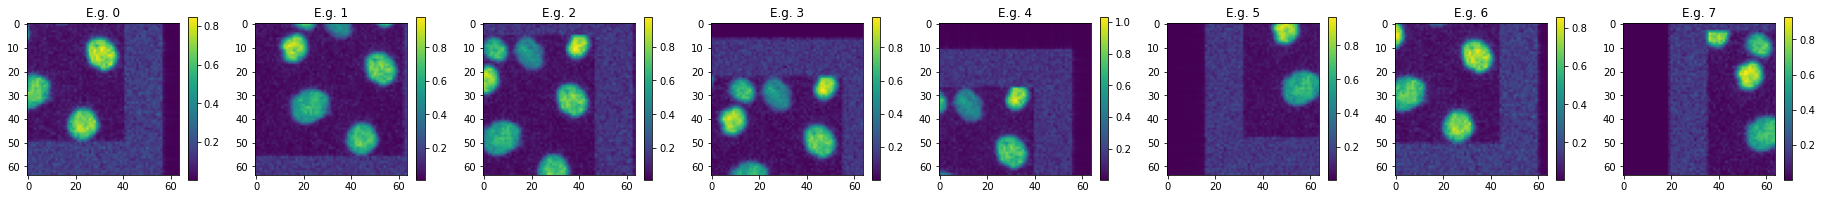

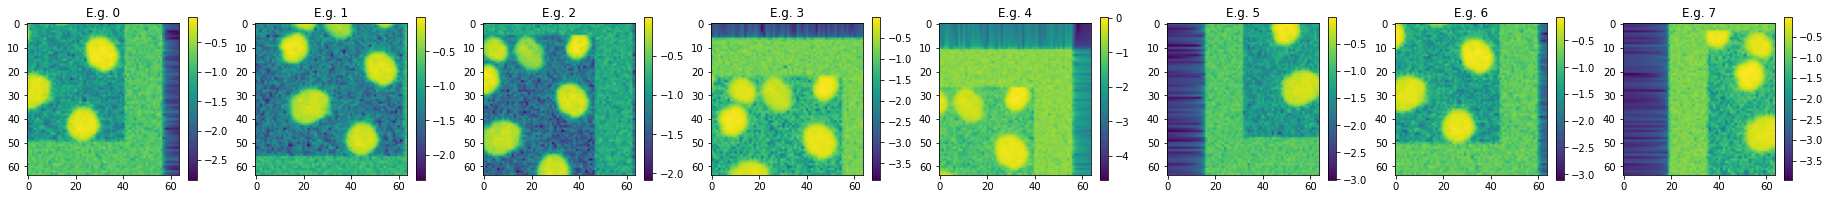

In [14]:
reload(model)
print(train_image_dataloader.dataset[0][0].shape)
encoder_model = model.Template2DModel(img_size=(64,64),
                                      fit_params=['x','y'],
                                      # max_psf_count=3,
                                      template_init=train_image_dataloader.dataset[0][0].mean(0), template_padding=(16,16),
                                      depth=4, first_layer_out_channels=16,)
# print(summary(encoder_model, input_size=(8, 1, 64, 64), row_settings=["var_names"],))

model.check_model(encoder_model, train_image_dataloader)